## Importing libraries

In [1]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

## Loading & reading image

In [2]:
!wget -O image.png https://raw.githubusercontent.com/ozgunsungar/Corner-Edge_Detection/main/image.png

--2022-04-01 15:19:17--  https://raw.githubusercontent.com/ozgunsungar/Corner-Edge_Detection/main/image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64801 (63K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]  63.28K  --.-KB/s    in 0.001s  

2022-04-01 15:19:17 (43.9 MB/s) - ‘image.png’ saved [64801/64801]



**For a grayscale image (8bit)**

In [3]:
img = cv2.imread("image.png",0)

## Question 1 : performing histogram equalization

In [4]:
def my_histogram_eq(img):

  intensities = count_intensities(img) 
  h = img.shape[0]
  w = img.shape[1]
  probabilities = [x / (h*w) for x in intensities]

  s_values = transformation_func(probabilities)

  draw_histogram(s_values)

  shape = (h,w)
  s_values = np.array(s_values)
  s_values.astype('uint8')
  flat = img.flatten()
  img_new = s_values[flat]
  img_new = np.reshape(img_new, img.shape)

  #OpenCv Built-in function
  equ = cv2.equalizeHist(img)

  fig= plt.figure()
  fig.add_subplot(1,3,1)
  plt.title("Original")
  plt.imshow(img, cmap='gray')



  fig.set_figheight(15)
  fig.set_figwidth(24)

  fig.add_subplot(1,3,2)
  plt.title("OpenCv Equalization")
  plt.imshow(equ, cmap='gray')

  # display the new image
  fig.add_subplot(1,3,3)
  plt.title("My Output")
  plt.imshow(img_new, cmap='gray')

  

  plt.show(block=True)

  


In [5]:
def count_intensities(img):
  intensities = [0] * 256
  h,w  = img.shape
  for i in range(0,h):
    for j in range(0,w):
      pixel_value = img[i,j]
      intensities[pixel_value]+=1
      
  return intensities


In [6]:
def transformation_func(probabilities): 
  s_values=[]
  index = 0
  sum =0
  temp = 0
  for probability in probabilities:
    sum += probability
    s_values.append(round(sum*255))
  return s_values

In [7]:
def draw_histogram(s_values):
  lenght = [*range(0,256)]

  fig = plt.figure(figsize = (10, 7))
  plt.plot(lenght, s_values)
  plt.xlabel("0-255 pixel value")
  plt.ylabel("Intensity")
  plt.title("Histogram")

  plt.show()

## Question 2 : Applying average filter with "same" parameter

In [8]:
def average_filtering(img,kernel):
  kernel = np.array(kernel)

  #check padding
  padding_x,padding_y = check_padding(img,kernel)

  img_pad = cv2.copyMakeBorder(img, padding_y, padding_y, padding_x, padding_x, cv2.BORDER_CONSTANT, (0,0,0)) #top,bottom,left,right

  n = kernel.shape[0]
  w, h = img.shape[1], img.shape[0]
  filter_img = np.array([[0 for x in range(w)] for y in range(h)])
  # write your convolution function
  for i in range(0,img_pad.shape[0]-(n-1)):
    for j in range(0, img_pad.shape[1]-(n-1)):
      if i > img_pad.shape[0] or j >img_pad.shape[1]:
        continue 

      # filter_img[i][j]= np.sum((img[i:i+3, j:j+3])*np.divide(kernel,8))
      filter_img[i][j]= np.sum((img_pad[i:i+n, j:j+n])*kernel)

  return filter_img

In [9]:
def check_padding(img,kernel):
  #padding_up or padding_down = ( (n_vertical-1)*stride-n_vertical+kernel_vertical )/2
  stride = 1

  #for vertical
  n_vertical = img.shape[0]

  kernel_vertical = kernel.shape[0]

  padding_y = ( (n_vertical-1)*stride+(kernel_vertical-n_vertical) )/2   

  #for horizontal
  n_horizontal = img.shape[1]
  kernel_horizontal = kernel.shape[1]
  padding_x = ( (n_horizontal-1)*stride+(kernel_horizontal-n_horizontal) )/2   

  return int(padding_y),int(padding_x)


In [10]:
n_vertical = img.shape[0]
kernel = np.ones((5,5),np.float32)/25

kernel_vertical = kernel.shape[0]
padding_y = ( (n_vertical-1)*1+(kernel_vertical-n_vertical) )/2   
print(padding_y)

2.0


## Main function

In [11]:
def main():
  print("********************QUESTION 1********************")
  my_histogram_eq(img)

  print("********************QUESTION 2********************")
  kernel = np.ones((5,5),np.float32)/25
  dst = cv2.filter2D(img,-1,kernel)
  img_filtered = average_filtering(img,kernel)
  fig= plt.figure()
  fig.set_figheight(15)
  fig.set_figwidth(24)

  fig.add_subplot(1,3,1)
  plt.title("Original")
  plt.imshow(img, cmap='gray')

  fig.add_subplot(1,3,2)
  plt.title("OpenCv Filtering")
  plt.imshow(dst, cmap='gray')

  fig.add_subplot(1,3,3)
  plt.title("My Output")
  plt.imshow(img_filtered, cmap='gray')


********************QUESTION 1********************


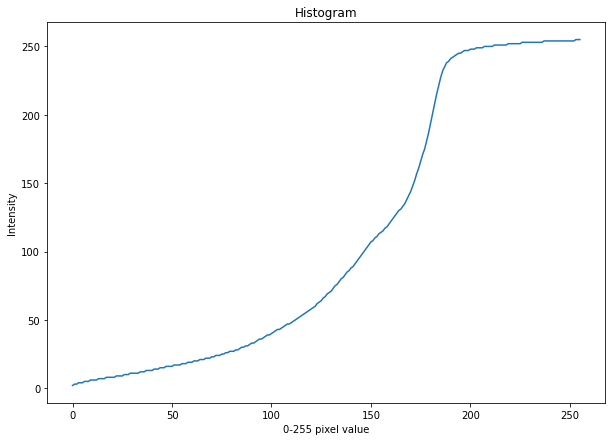

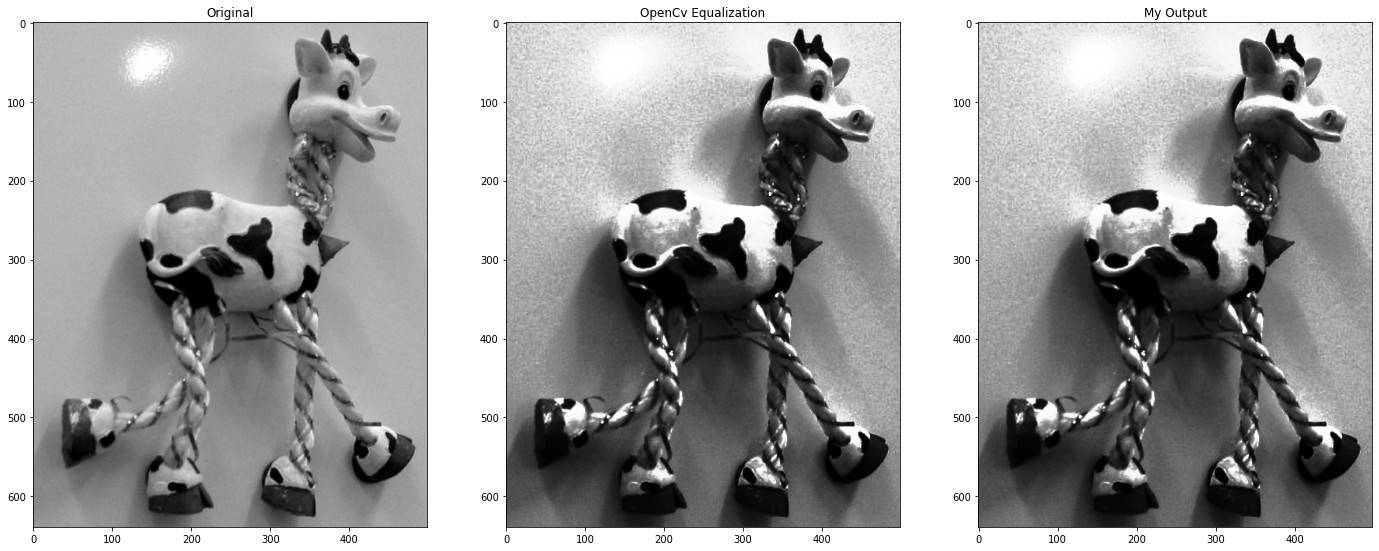

********************QUESTION 2********************


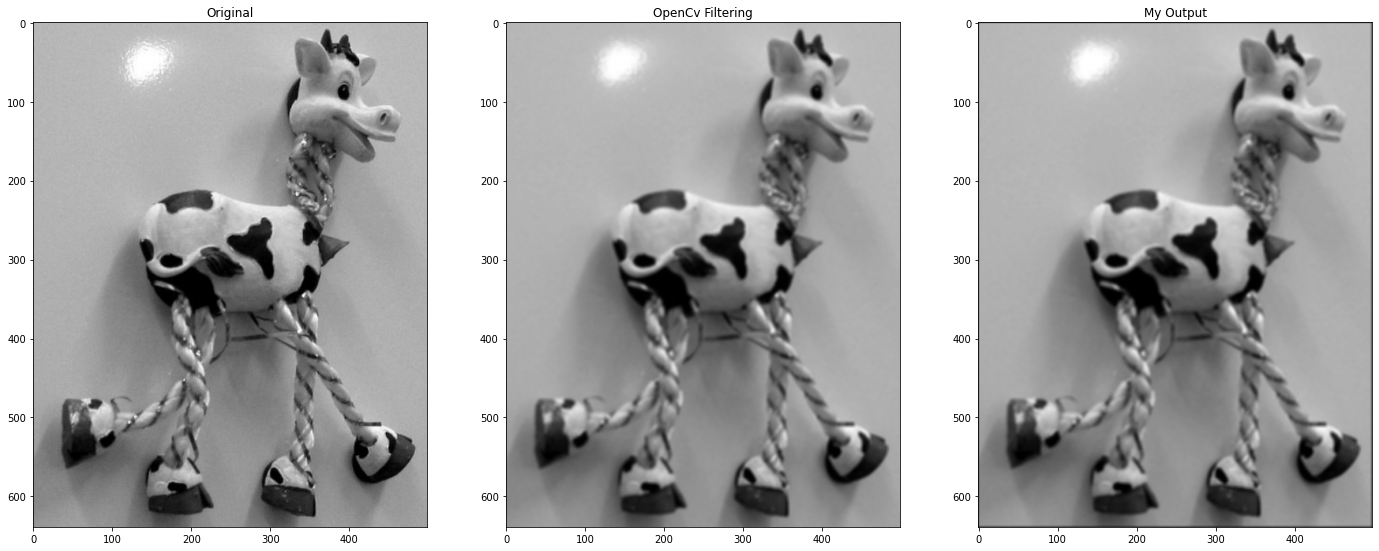

In [12]:
if __name__ == "__main__":
  main()